Visialization of hand written digit using  t-Distributed Stochastics Neighbour Embedding (t-SNE) decomposition

In [9]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

from sklearn import datasets
from sklearn import manifold
%matplotlib inline


In [4]:
data = datasets.fetch_openml('mnist_784' , version=1 , return_X_y= True)
pixel_values , targets = data
targets = targets.astype(int)

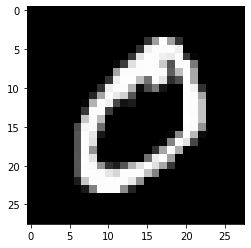

In [5]:
single_image = pixel_values[1, :].reshape(28 , 28)
plt.imshow(single_image , cmap = 'gray')

In [6]:
tnse = manifold.TSNE(n_components= 2 , random_state = 42)
transformed_data = tnse.fit_transform(pixel_values[:3000 , :])

In [7]:
tnse_df = pd.DataFrame(
    np.column_stack((transformed_data , targets[:3000])),
    columns = ['X' , 'y' , 'targets']
)
tnse_df.loc[ : , 'targets'] = tnse_df.targets.astype(int)

In [8]:
tnse_df.head()

,X,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


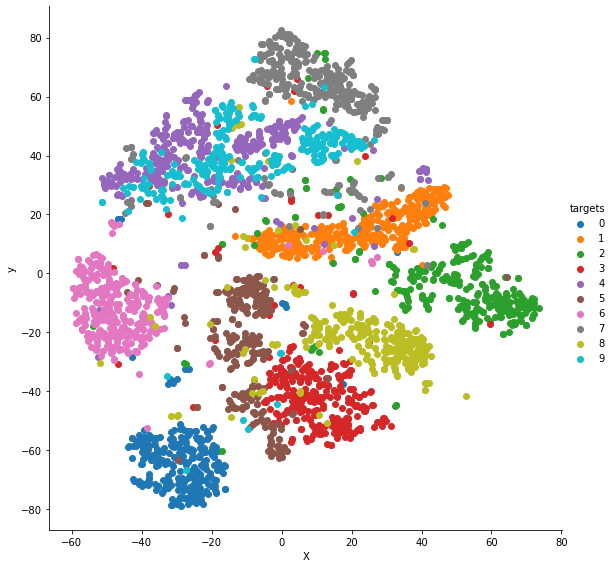

In [10]:
grid = sns.FacetGrid(tnse_df , hue = 'targets' , size= 8)
grid.map(plt.scatter , 'X' , 'y').add_legend()